<a href="https://colab.research.google.com/github/cal-wells/sql-python-projects/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Analyis
Workbook to practice SQL and Python using Netflix Data from Kaggle

## Retrieve Data from Github and create SQL Database

In [1]:
# Libraries
import sqlite3
import pandas as pd

# Github URL
url = "https://raw.githubusercontent.com/cal-wells/sql-python-projects/refs/heads/main/netflix_titles.csv"
df = pd.read_csv(url)

# Create a connection to database
conn = sqlite3.connect("netflix.db")

# Use the .to_sql() method to create an SQL table called 'netflix'
df.to_sql("netflix", conn, if_exists = "replace", index = False)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Question 1
Which 10 countries produce the most content?

In [2]:
# Write the SQL query as a Python string
country_query = """
                SELECT
                  country,
                  COUNT(1) AS num_content
                FROM
                  netflix
                WHERE
                  country IS NOT NULL
                GROUP BY
                  country
                ORDER BY
                  num_content DESC
                LIMIT 10
                """

# Execute the query and load the results into a dataframe
country_query_df = pd.read_sql(country_query, conn)
country_query_df

,country,num_content
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


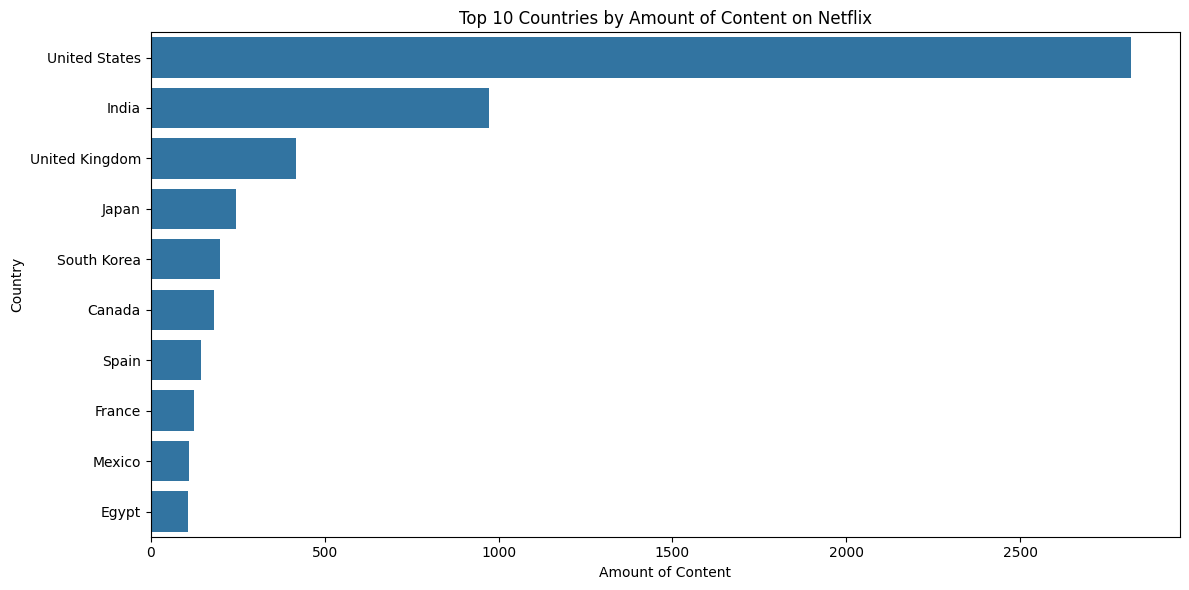

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='num_content', y='country', data=country_query_df)
plt.title('Top 10 Countries by Amount of Content on Netflix')
plt.xlabel('Amount of Content')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Question 2
How has the amount of content added to Netflix changed over the years?

In [4]:
content_by_year_query = """
                        SELECT
                          CAST(substr(date_added, -4) AS INTEGER) AS year,
                          COUNT(1) AS num_content
                        FROM
                          netflix
                        WHERE
                          date_added IS NOT NULL
                        GROUP BY
                          year
                        ORDER BY
                          year
                        """
content_by_year_query_df = pd.read_sql(content_by_year_query, conn)
content_by_year_query_df

,year,num_content
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,429
9,2017,1188


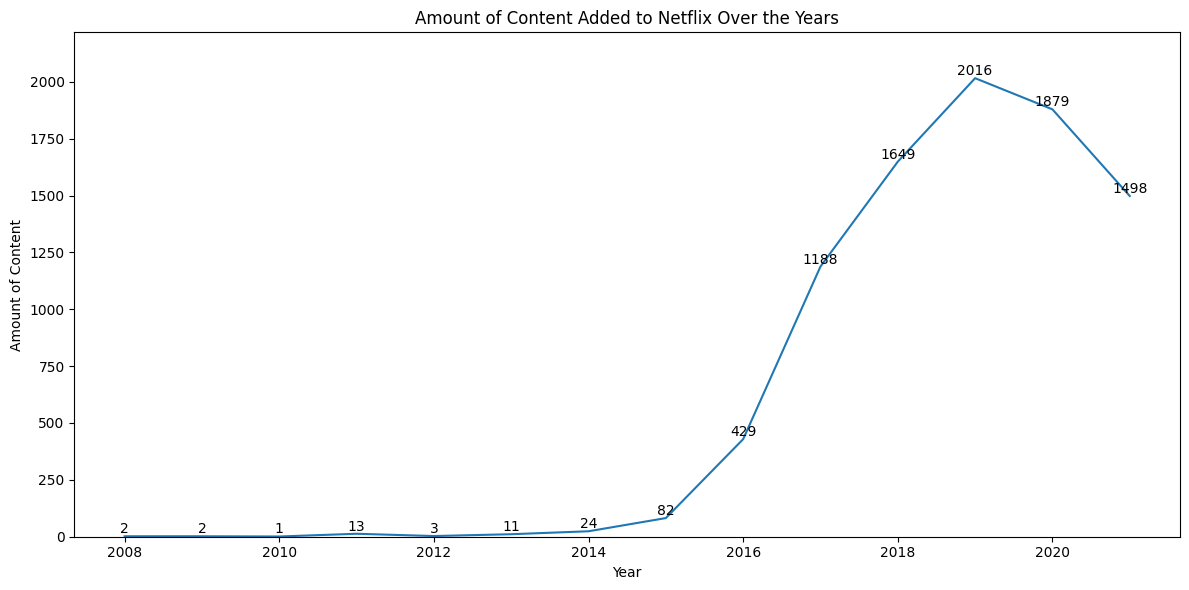

In [20]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='year', y='num_content', data=content_by_year_query_df)
plt.title('Amount of Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount of Content')

# Add data labels
for x, y in zip(content_by_year_query_df['year'], content_by_year_query_df['num_content']):
    ax.text(x, y, y, ha='center', va='bottom')

# Set the y-axis to start at 0
plt.ylim(0, content_by_year_query_df['num_content'].max() * 1.1) # Add a little padding at the top

plt.tight_layout()
plt.show()

## Challenge 1
What are the five most common genres listed?

In [22]:
genre_query = """
              SELECT
                listed_in,
                COUNT(1) AS num_content
              FROM
                netflix
              WHERE
                listed_in IS NOT NULL
              GROUP BY
                listed_in
              ORDER BY
                num_content DESC
              LIMIT 5
              """

genre_query_df = pd.read_sql(genre_query, conn)
genre_query_df

,listed_in,num_content
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252


## Challenge 2
How many 'Movies' are there compared to 'TV Shows'?

In [23]:
type_query = """
             SELECT
               type,
               COUNT(1) AS num_content
             FROM
               netflix
             WHERE
               type == 'Movie' OR type == 'TV Show'
             GROUP BY
               type
             """

type_query_df = pd.read_sql(type_query, conn)
type_query_df

,type,num_content
0,Movie,6131
1,TV Show,2676
